# Code for Figure 2 part (b) 

Developed by Siobhan Powell, 2021. 

In [1]:
import os
os.chdir('../')

In [2]:
import matplotlib

matplotlib.rcParams['font.family'] = 'arial'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import pickle
import datetime

In [4]:
noev_scenario = pd.read_csv('Results/NoEVs_year2035_solar3.5x_wind3x_withstorage_dpdf_20220408.csv')

In [5]:
scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

vals = np.zeros((10, 7, 5)) # peak mean weekday total demand
vals2 = np.zeros((10, 7, 5)) # time of day
tables_dfs = {penlevel: pd.DataFrame(np.zeros((7, 5)), 
                                     index=['_TimersRandom_noWPcontrol', '_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                                     columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual']) for penlevel in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
tables_dfs_timeofpeak = {penlevel: pd.DataFrame(np.zeros((7, 5)), 
                                                index=['_TimersRandom_noWPcontrol', '_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                                                columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual']) for penlevel in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

for k, penlevel in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
    if penlevel == 0.5:
        folder = 'Fuel1_Solar35_Wind3'
    else:
        folder = 'Fuel1_Solar35_Wind3_Curves'
    for i, scen1 in enumerate(scens1):
        for j, scen2 in enumerate(scens2):
            demand_df = pd.read_csv('Results/'+folder+'/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20220408.csv')
            inds = demand_df[pd.to_datetime(demand_df['datetime']).dt.weekday.isin([0,1,2,3,4])].index
            vals[k, i, j] = demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
            vals2[k, i, j] = np.where(demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0) == demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max())[0][0]
            tables_dfs[penlevel].loc[scen1, scen2] = demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
            tables_dfs_timeofpeak[penlevel].loc[scen1, scen2] = np.where(demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0) == demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max())[0][0]
        
    scen2 = 'BusinessAsUsual'
    scen1 =  '_TimersMixed_WPcontrol_minpeak'
    i = i+1
    j = j+1
    demand_df = pd.read_csv('Results/'+folder+'/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20220408.csv')
    inds = demand_df[pd.to_datetime(demand_df['datetime']).dt.weekday.isin([0,1,2,3,4])].index
    vals[k, i, j] = demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
    vals2[k, i, j] = np.where(demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0) == demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max())[0][0]
    tables_dfs[penlevel].loc[scen1, scen2] = demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
    tables_dfs_timeofpeak[penlevel].loc[scen1, scen2] = np.where(demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0) == demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max())[0][0]




In [6]:
vals_shift = noev_scenario.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()

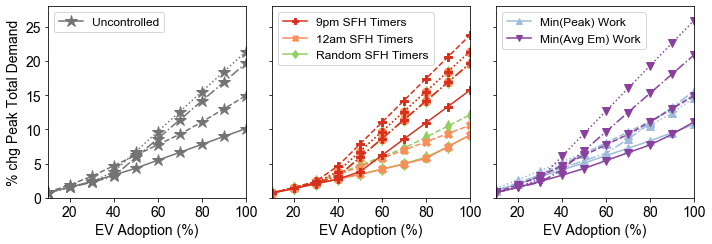

In [7]:

fig, axes = plt.subplots(1, 3, figsize=(10, 3.5))
colors = ['#d7301f', '#fc8d59', '#91cf60', '#737373', '#9ebcda', '#88419d']
lines = ['--', '-', ':', '-.']

markers=['P', 'X', 'd', '*', '^', 'v']
ms = [8, 8,8,12,8,8]

idx_control = 3
for idx_access in range(4):
    axes[0].plot(np.arange(10, 105, 10), 100*((vals[:, idx_control, idx_access]-vals_shift)/vals_shift), lines[idx_access], color=colors[idx_control], marker=markers[idx_control],  markersize=ms[idx_control])
axes[0].set_xticks(np.arange(20, 125, 20))
axes[0].set_xticklabels(np.arange(20, 125, 20), fontsize=14)
axes[0].set_xlabel('EV Adoption (%)', fontsize=14)
axes[0].set_yticks(np.arange(0, 27, 5))
axes[0].set_yticklabels(np.arange(0, 27, 5), fontsize=14)
axes[0].set_ylabel('% chg Peak Total Demand', fontsize=14)
axes[0].set_xlim([10, 100])
axes[0].set_ylim([0, 28])
# axes[0].set_axisbelow(True)        
# axes[0].grid()

for idx_control in [2, 1, 0]:
    for idx_access in range(4):
        axes[1].plot(100*np.arange(0.1, 1.05, 0.1), 100*((vals[:, idx_control, idx_access]-vals_shift)/vals_shift), lines[idx_access], color=colors[idx_control], marker=markers[idx_control],  markersize=ms[idx_control])
# axes[1].set_xticks(np.arange(10, 105, 20))
# axes[1].set_xticklabels(np.arange(10, 105, 20), fontsize=14)
axes[1].set_xticks(np.arange(20, 125, 20))
axes[1].set_xticklabels(np.arange(20, 125, 20), fontsize=14)
axes[1].set_yticks(np.arange(0, 28, 5))
axes[1].set_yticklabels([])
axes[1].set_xlabel('EV Adoption (%)', fontsize=14)
axes[1].set_xlim([10, 100])
axes[1].set_ylim([0, 28])
legend_elements=[Line2D([0], [0], marker=markers[0], color=colors[0], label='9pm SFH Timers'), 
                 Line2D([0], [0], marker=markers[1], color=colors[1], markerfacecolor=colors[1], label='12am SFH Timers'), 
                    Line2D([0], [0], marker=markers[2], color=colors[2], markerfacecolor=colors[2], label='Random SFH Timers')]
axes[1].legend(handles=legend_elements, loc='upper left', fontsize=12)
# axes[1].set_axisbelow(True)        
# axes[1].grid()

for idx_control in [4, 5]:
    for idx_access in range(4):
        axes[2].plot(100*np.arange(0.1, 1.05, 0.1), 100*((vals[:, idx_control, idx_access]-vals_shift)/vals_shift), lines[idx_access], color=colors[idx_control], marker=markers[idx_control], markersize=ms[idx_control])
axes[2].set_xticks(np.arange(20, 125, 20))
axes[2].set_xticklabels(np.arange(20, 125, 20), fontsize=14)
axes[2].set_xlabel('EV Adoption (%)', fontsize=14)
axes[2].set_yticks(np.arange(0, 28, 5))
axes[2].set_yticklabels([])
axes[2].set_xlim([10, 100])
axes[2].set_ylim([0, 28])
legend_elements=[Line2D([0], [0], marker=markers[4], color=colors[4], markerfacecolor=colors[4], label='Min(Peak) Work'), 
                 Line2D([0], [0], marker=markers[5], color=colors[5], markerfacecolor=colors[5], label='Min(Avg Em) Work')]
axes[2].legend(handles=legend_elements, loc='upper left', fontsize=12)
# axes[2].set_axisbelow(True)        
# axes[2].grid()

legend_elements = [Line2D([0], [0], marker='*', markersize=12, color=colors[3], label='Uncontrolled', linestyle='-')]
legend = axes[0].legend(handles=legend_elements, loc='upper left', fontsize=12)#, title='Access Scenario')

plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig2b_vFINAL_v2.pdf', bbox_inches='tight')
plt.show()

In [10]:
tables_dfs[1.0].round(2).to_csv('MainPlotting/Tables/peak_total_demand_100p_mw_2035.csv')
tables_dfs[0.5].round(2).to_csv('MainPlotting/Tables/peak_total_demand_50p_mw_2035.csv')


In [9]:
tables_dfs[1.0].round(2)

,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BusinessAsUsual
_TimersRandom_noWPcontrol,122760.91,119523.22,132906.28,131004.20,0.00
_Timers9pm_noWPcontrol,135520.18,126701.70,132894.22,130994.65,0.00
_Timers12am_noWPcontrol,121084.18,119526.14,132878.45,130974.67,0.00
_TimersNone_noWPcontrol,125822.31,120568.04,132886.91,131015.36,0.00
_TimersNone_WPcontrol_minpeak,125959.96,121228.26,125504.67,126554.94,0.00
_TimersNone_WPcontrol_avgem,125822.96,121631.60,137857.18,132345.38,0.00
_TimersMixed_WPcontrol_minpeak,0.00,0.00,0.00,0.00,119776.68


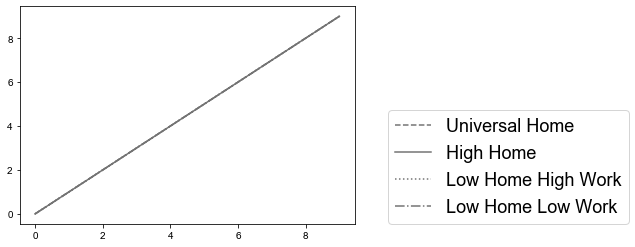

In [10]:
lines = ['--', '-', ':', '-.']
access_labels = ['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']
plt.figure()
idx_control = 3
for idx_access in range(4):
    plt.plot(np.arange(0, 10), lines[idx_access], color=colors[idx_control], marker=None,  markersize=ms[idx_control], label=access_labels[idx_access])
plt.legend(loc=(1.1,0), fontsize=18)
plt.savefig('lines_legend.pdf', bbox_inches='tight')
plt.show()
# axes[0].set_axisbelow(True)  

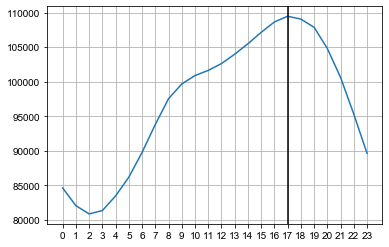

Max value without EVs occurs at 5pm:  109478.38


In [11]:
plt.plot(np.arange(0, 24), noev_scenario.loc[pd.to_datetime(noev_scenario['datetime']).dt.weekday.isin([0,1,2,3,4])]['total_incl_noncombustion'].values.reshape(-1, 24).mean(axis=0))
plt.xticks(np.arange(0, 24))
plt.axvline(17, color='k')
plt.grid()
plt.show()
print('Max value without EVs occurs at 5pm: ', np.round(noev_scenario.loc[pd.to_datetime(noev_scenario['datetime']).dt.weekday.isin([0,1,2,3,4])]['total_incl_noncombustion'].values.reshape(-1, 24).mean(axis=0).max(), 2))

In [12]:
vals_shift = noev_scenario.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()

print('Percent change at 50% adoption: ')
(tables_dfs[0.5] - vals_shift) / vals_shift

Percent change at 50% adoption: 


,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BusinessAsUsual
_TimersRandom_noWPcontrol,0.047591,0.034234,0.067746,0.059060,-1.000000
_Timers9pm_noWPcontrol,0.078452,0.038177,0.067691,0.059016,-1.000000
_Timers12am_noWPcontrol,0.045701,0.034174,0.067619,0.058925,-1.000000
_TimersNone_noWPcontrol,0.062278,0.043343,0.067658,0.059110,-1.000000
_TimersNone_WPcontrol_minpeak,0.064510,0.050899,0.065970,0.054285,-1.000000
_TimersNone_WPcontrol_avgem,0.062038,0.042854,0.093780,0.068607,-1.000000
_TimersMixed_WPcontrol_minpeak,-1.000000,-1.000000,-1.000000,-1.000000,0.046369


In [13]:
print('Hour of peak in mean weekday total demand at 50%:')
tables_dfs_timeofpeak[0.5]

Hour of peak in mean weekday total demand at 50%:


,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BusinessAsUsual
_TimersRandom_noWPcontrol,19.0,17.0,10.0,10.0,0.0
_Timers9pm_noWPcontrol,21.0,21.0,10.0,10.0,0.0
_Timers12am_noWPcontrol,19.0,17.0,10.0,10.0,0.0
_TimersNone_noWPcontrol,19.0,19.0,10.0,10.0,0.0
_TimersNone_WPcontrol_minpeak,19.0,17.0,17.0,17.0,0.0
_TimersNone_WPcontrol_avgem,19.0,19.0,11.0,11.0,0.0
_TimersMixed_WPcontrol_minpeak,0.0,0.0,0.0,0.0,17.0


In [14]:
vals_shift = noev_scenario.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()

print('Percent change at 100% adoption: ')
(tables_dfs[1.0] - vals_shift) / vals_shift

Percent change at 100% adoption: 


,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BusinessAsUsual
_TimersRandom_noWPcontrol,0.121326,0.091752,0.213996,0.196622,-1.000000
_Timers9pm_noWPcontrol,0.237872,0.157322,0.213885,0.196534,-1.000000
_Timers12am_noWPcontrol,0.106010,0.091778,0.213741,0.196352,-1.000000
_TimersNone_noWPcontrol,0.149289,0.101295,0.213819,0.196724,-1.000000
_TimersNone_WPcontrol_minpeak,0.150546,0.107326,0.146388,0.155981,-1.000000
_TimersNone_WPcontrol_avgem,0.149295,0.111010,0.259218,0.208872,-1.000000
_TimersMixed_WPcontrol_minpeak,-1.000000,-1.000000,-1.000000,-1.000000,0.094067


In [15]:
print('Hour of peak in mean weekday total demand at 100%:')
tables_dfs_timeofpeak[1.0]

Hour of peak in mean weekday total demand at 100%:


,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BusinessAsUsual
_TimersRandom_noWPcontrol,20.0,10.0,10.0,10.0,0.0
_Timers9pm_noWPcontrol,21.0,21.0,10.0,10.0,0.0
_Timers12am_noWPcontrol,19.0,10.0,10.0,10.0,0.0
_TimersNone_noWPcontrol,20.0,19.0,10.0,10.0,0.0
_TimersNone_WPcontrol_minpeak,20.0,19.0,10.0,10.0,0.0
_TimersNone_WPcontrol_avgem,20.0,11.0,11.0,11.0,0.0
_TimersMixed_WPcontrol_minpeak,0.0,0.0,0.0,0.0,20.0


In [16]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

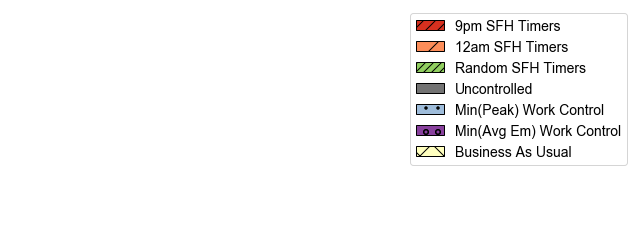

In [17]:
fig, axes = plt.subplots(1, 1, figsize=(9, 3.5))
titles=['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']
colors = ['#d7301f', '#fc8d59', '#91cf60', '#737373', '#9ebcda', '#88419d']
control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Random SFH Timers', 'Uncontrolled', 'Min(Peak) Work Control', 'Min(Avg Em) Work Control']
hatches = ['//', '/', '///', '', '.', 'o']

edgecolors=[None, None, 'k', None, None]
legend_elements = [Patch(facecolor=colors[i], edgecolor='k', hatch=hatches[i],
                             label=control_labels[i]) for i in range(len(control_labels))]
legend_elements.append(Patch(facecolor='#ffffbf', edgecolor='k', label='Business As Usual', hatch='x'))
axes.legend(handles=legend_elements, fontsize=14, ncol=1)
axes.set_axis_off()
plt.tight_layout()
plt.savefig('MainPlotting/patch_legend_vFINAL.pdf', bbox_inches='tight')
plt.show()